Epoch 1/50
2/2 [==============================] - 0s 98ms/step - loss: 1.3367 - val_loss: 1.0689
Epoch 2/50
2/2 [==============================] - 0s 24ms/step - loss: 1.3293 - val_loss: 1.0628
Epoch 3/50
2/2 [==============================] - 0s 19ms/step - loss: 1.3219 - val_loss: 1.0568
Epoch 4/50
2/2 [==============================] - 0s 19ms/step - loss: 1.3147 - val_loss: 1.0510
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 1.3078 - val_loss: 1.0453
Epoch 6/50
2/2 [==============================] - 0s 28ms/step - loss: 1.3009 - val_loss: 1.0397
Epoch 7/50
2/2 [==============================] - 0s 21ms/step - loss: 1.2942 - val_loss: 1.0344
Epoch 8/50
2/2 [==============================] - 0s 21ms/step - loss: 1.2877 - val_loss: 1.0291
Epoch 9/50
2/2 [==============================] - 0s 24ms/step - loss: 1.2812 - val_loss: 1.0239
Epoch 10/50
2/2 [==============================] - 0s 20ms/step - loss: 1.2749 - val_loss: 1.0189
Epoch 11/50
2/2 [============

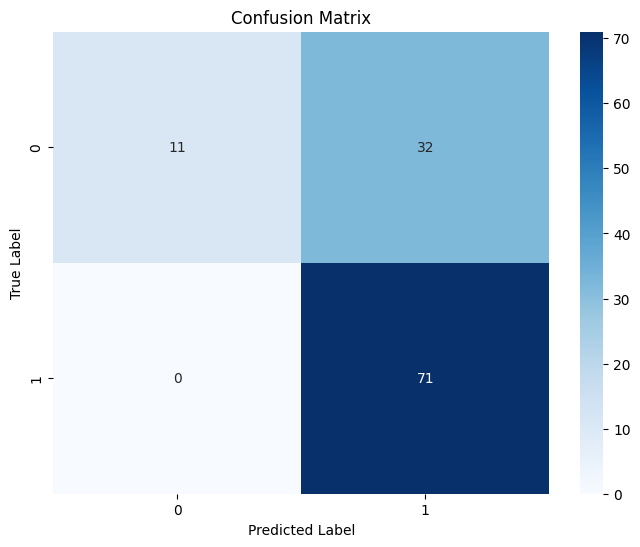

In [3]:
#semi-supervised
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 14  # You can adjust this
input_data = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val, X_val))

# Transform the data
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Train GMM on the encoded data
n_components = 4  # You can adjust this
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_encoded)

# Classify transactions
y_val_pred = gmm.predict(X_val_encoded)
y_val_pred_binary = (y_val_pred != 0).astype(int)

y_test_pred = gmm.predict(X_test_encoded)
y_test_pred_binary = (y_test_pred != 0).astype(int)

# Evaluate the model using binary classification
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1_score = fbeta_score(y_test, y_test_pred_binary, beta=1)
test_f2_score = fbeta_score(y_test, y_test_pred_binary, beta=2)

print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)
print("F2 Score:", test_f2_score)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Epoch 1/50
2/2 [==============================] - 1s 218ms/step - loss: 1.2650 - val_loss: 1.0230
Epoch 2/50
2/2 [==============================] - 0s 65ms/step - loss: 1.2569 - val_loss: 1.0159
Epoch 3/50
2/2 [==============================] - 0s 58ms/step - loss: 1.2490 - val_loss: 1.0088
Epoch 4/50
2/2 [==============================] - 0s 52ms/step - loss: 1.2413 - val_loss: 1.0018
Epoch 5/50
2/2 [==============================] - 0s 72ms/step - loss: 1.2337 - val_loss: 0.9950
Epoch 6/50
2/2 [==============================] - 0s 75ms/step - loss: 1.2262 - val_loss: 0.9883
Epoch 7/50
2/2 [==============================] - 0s 100ms/step - loss: 1.2189 - val_loss: 0.9817
Epoch 8/50
2/2 [==============================] - 0s 116ms/step - loss: 1.2118 - val_loss: 0.9752
Epoch 9/50
2/2 [==============================] - 0s 97ms/step - loss: 1.2046 - val_loss: 0.9688
Epoch 10/50
2/2 [==============================] - 0s 64ms/step - loss: 1.1976 - val_loss: 0.9625
Epoch 11/50
2/2 [=========

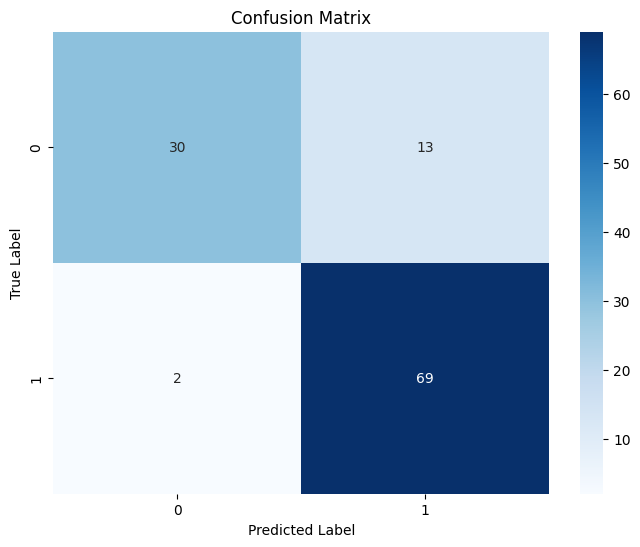

In [2]:
#supervised
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 14  # You can adjust this
input_data = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Autoencoder only on labeled data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val, X_val))

# Transform the data using the trained encoder
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Train GMM only on the encoded labeled data
n_components = 4  # You can adjust this
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_encoded)

# Classify transactions using the trained GMM
y_val_pred = gmm.predict(X_val_encoded)
y_val_pred_binary = (y_val_pred != 0).astype(int)

y_test_pred = gmm.predict(X_test_encoded)
y_test_pred_binary = (y_test_pred != 0).astype(int)

# Evaluate the model using binary classification metrics
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1_score = fbeta_score(y_test, y_test_pred_binary, beta=1)
test_f2_score = fbeta_score(y_test, y_test_pred_binary, beta=2)

print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)
print("F2 Score:", test_f2_score)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()